In [2]:
import torch
import torchvision
import numpy as np
import cv2

In [3]:

# 加载训练好的神经网络
model = torchvision.models.resnet18(pretrained=True)
model.eval()

/home/zhaobenyan/miniconda3/envs/neuro/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/zhaobenyan/miniconda3/envs/neuro/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# 选择一个输入图像作为可视化的对象
image_path = "./both.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype(np.float32) / 255.0
image = np.transpose(image, (2, 0, 1))
image = torch.from_numpy(image)
image = image.unsqueeze(0)

# 计算损失函数对该输入的导数
image.requires_grad = True
output = model(image)
print(f"output={output}")

output=tensor([[-4.4622e+00, -3.3633e+00, -9.0577e-01,  4.0646e-01,  9.2026e-01,
         -1.0340e+00,  2.1242e+00, -2.2665e+00, -4.2033e+00, -1.8806e+00,
         -1.8796e+00, -4.5455e+00, -3.2202e+00, -1.6861e+00, -5.3508e+00,
         -4.8555e+00, -5.6511e+00, -7.3056e-01, -6.5263e+00, -1.9674e+00,
         -7.3063e+00, -2.8692e+00, -5.1496e+00, -2.3204e+00, -1.3862e+00,
         -3.6205e+00, -3.3173e+00, -5.3110e+00, -3.6929e+00, -2.2461e+00,
         -3.2251e-01, -1.3232e+00, -1.6201e+00,  4.4502e+00,  2.8160e+00,
          1.3280e-01,  2.1004e+00,  9.4890e-01,  1.4674e+00,  3.9219e+00,
         -3.1076e+00,  2.2389e-01, -3.6143e+00,  7.6957e-01, -2.4248e+00,
          1.9537e+00, -3.9194e-01,  8.3588e-01,  3.7573e+00, -7.5541e-01,
          1.2173e+00,  3.2811e+00, -2.3270e+00, -4.1350e+00,  1.1849e+00,
         -2.0152e+00, -1.7214e-01, -1.7213e+00,  6.7685e-01, -2.8272e+00,
          6.6560e-01,  2.8132e+00,  1.2739e+00,  6.3999e-02, -5.7946e-01,
          1.8809e+00,  1.2761e+

In [5]:
loss = torch.nn.functional.softmax(output, dim=1)[0, 0]
loss.backward()
grad = image.grad.data.cpu().numpy()[0]
grad = np.abs(grad).max(axis=0)
print(f"grad={grad}")


grad=[[6.9735501e-10 8.2426227e-10 8.0661156e-10 ... 1.1517263e-10
  4.6262306e-11 1.7307669e-10]
 [5.7854876e-10 1.1698940e-09 1.3507655e-09 ... 1.6132037e-10
  1.5139610e-10 2.0841934e-10]
 [4.4259207e-10 4.4141132e-10 1.0543061e-09 ... 2.4599806e-10
  3.2052722e-10 2.4406574e-10]
 ...
 [1.4022212e-09 1.0134138e-09 1.2684132e-09 ... 3.4363429e-10
  2.6978114e-10 2.1501285e-10]
 [7.0803330e-10 1.9807567e-09 2.8208811e-09 ... 6.0812827e-11
  4.5212967e-10 2.2239087e-10]
 [1.3886124e-09 5.6604632e-10 4.0621817e-10 ... 2.5875374e-10
  2.5561514e-10 5.3563953e-10]]


In [6]:
# 可视化导数
grad *= 255.0 / grad.max()
grad = np.uint8(grad)
grad = cv2.resize(grad, (image.shape[3], image.shape[2]))

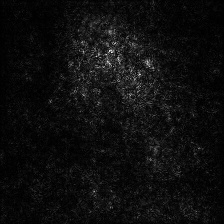

In [7]:
# 保存梯度图像
cv2.imwrite("./gradient.jpg", grad)

# 在Notebook中显示梯度图像
from IPython.display import Image
Image(filename="./gradient.jpg")